# Overview

This notebook will walk through how to build a neural network model using `sci-kit learn` for a binary target. The data in question is medical information about a number of adult women of Pima Indian heritage. The goal of the model is to help predict if the woman has diabetes.

@misc{Dua:2019 ,
author = "Dua, Dheeru and Graff, Casey",
year = "2017",
title = "{UCI} Machine Learning Repository",
url = "http://archive.ics.uci.edu/ml",
institution = "University of California, Irvine, School of Information and Computer Sciences" }

# Setup

These is where all the needed packages are imported for the exercise. If you get an `ModuleNotFoundError` then install the package (pip or conda) before continuing.

In [26]:
# All the needed imports
import pandas as pd 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Perceptron
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix, accuracy_score
import statsmodels.api as sm

## Load the data and create a dataframe

pandas can read data locally or from a URL. In this case you'll read data from the data directory and create a dataframe named `diabetes` that has health information on 768 women who are over 21 and of Pima Indian heritage.

After reading the data you'll use the `shape` method to get a count of the rows and columns. There should be 768 rows and 9 columns.

Source: Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.



In [2]:
diabetes = pd.read_csv('./data/diabetes.csv')
diabetes.shape

(768, 9)

## Look at the data for sanity check

After reading the data you'll print the first 5 rows using the `head` method to ensure the data appears correct.

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Seperate the inputs from the full data set

For modeling in sci-kit learn it is a standard practice to create different objects for the inputs (X varaibles, indepentdent variables) and the target (Y variable, dependent variable).

In [4]:
# first four columns of data
inputs = diabetes.iloc[:, 0:7]
target = diabetes.iloc[:, -1]

print(target[45:52], target.shape)

45    1
46    0
47    0
48    1
49    0
50    0
51    0
Name: Outcome, dtype: int64 (768,)


## Split the data into training and test

Creating a `training` and `validation` (some times called a `test`) set help prevent overfitting of the model. A model that is overfit will not be useful in predicting future behavior, which is the point of this modeling in the first place.

In [5]:
input_train, input_test, target_train, target_test = train_test_split(inputs, target, test_size = 0.30, random_state=9878)
print(input_train.shape, input_test.shape, target_train.shape, target_test.shape)

(537, 7) (231, 7) (537,) (231,)


## Scale the inputs

We need to scale the inputs to improve model performance. Scaling the inputs will substract the mean and scale to unit variance. See [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) for more information.

You will standardize the training and validation partiions seperatly to avoid bias and data leakage


## Training the model

To train a model, you must create an instance of the method (neural networks in this case) and then use the `fit` method. The way I remember the name is that I'm going to "fit" the inputs to the target. 

Below you will create a network with 10 hidden units in one layer. Feel free to experiment with different numbers of hidden units in 1 or more layers. To create a two hidden layers with 5 and 10 units respectively use this code `hidden_layer_sizes=(5, 10)`

## Using the Stats Model package

In [30]:
sm_reg = sm.Logit(target_train, input_train )
results = sm_reg.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.536580
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  537
Model:                          Logit   Df Residuals:                      530
Method:                           MLE   Df Model:                            6
Date:                Thu, 07 May 2020   Pseudo R-squ.:                  0.1481
Time:                        10:35:18   Log-Likelihood:                -288.14
converged:                       True   LL-Null:                       -338.24
Covariance Type:            nonrobust   LLR p-value:                 2.293e-19
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4294      0.107      4.002      0.000       0.219       0.640
x2             1.1789      0.148      7.955      0.000       0.888       1.469
x3            -0.1876      0.113     -1.656      0.098      -0.410       0.034
x4             0.0914      0.127      0.721      0.471      -0.157       0.340
x5            -0.3123      0.128     -2.444      0.015      -0.563      -0.062
x6             0.4521      0.127      3.569      0.000       0.204       0.700
x7             0.3279      0.114      2.885      0.004       0.105       0.551
==============================================================================
"""

In [23]:
log_reg = LogisticRegression()
log_reg.fit(input_train, target_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Class: <class 'sklearn.linear_model._perceptron.Perceptron'>
[[93 44]
 [60 34]]
              precision    recall  f1-score   support

           0       0.61      0.68      0.64       137
           1       0.44      0.36      0.40        94

    accuracy                           0.55       231
   macro avg       0.52      0.52      0.52       231
weighted avg       0.54      0.55      0.54       231

Accuracy: 0.5498


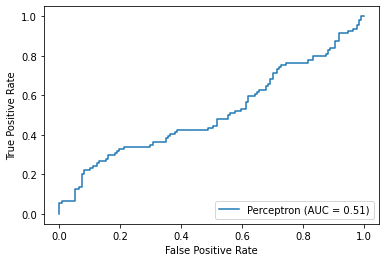

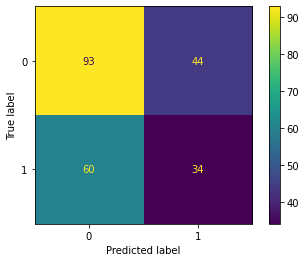

In [22]:
reg = Perceptron()
reg.fit(input_train, target_train)
model_report(reg)

Class: <class 'sklearn.linear_model._perceptron.Perceptron'>
[[117  20]
 [ 60  34]]
              precision    recall  f1-score   support

           0       0.66      0.85      0.75       137
           1       0.63      0.36      0.46        94

    accuracy                           0.65       231
   macro avg       0.65      0.61      0.60       231
weighted avg       0.65      0.65      0.63       231

Accuracy: 0.6537


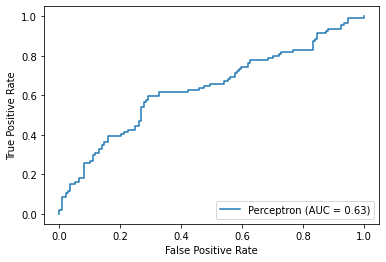

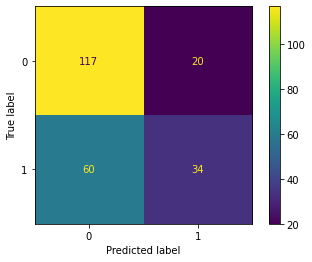

In [20]:
reg = Perceptron()
reg.fit(input_train, target_train)
model_report(reg)

## Prediction

To use the model created by the `fit` method, you must predict values. The code below uses the values from the validation partition to predict if the patient has diabeties. This prediction will then be compared to the actual values and you can assess the efficacy of the model

In [7]:
predictions = log_reg.predict(input_test)

## Model Efficacy

With predictons complete on the validation partition you can calculate the quality of the model. The confusion matrix, ROC chart, and classification report are a few ways to evaluate a model.

In [13]:
def model_report(model_obj):
    pred = model_obj.predict(input_test)
    print("Class: {}".format(model_obj.__class__))
    print(confusion_matrix(target_test,pred))
    print(classification_report(target_test,pred))
    print("Accuracy: {:0.4f}".format(accuracy_score(target_test,pred)))
    plot_roc_curve(model_obj, input_test, target_test);
    plot_confusion_matrix(model_obj, input_test, target_test, values_format ='');
    

In [8]:
print(confusion_matrix(target_test,predictions))
print(classification_report(target_test,predictions))

[[124  13]
 [ 41  53]]
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       137
           1       0.80      0.56      0.66        94

    accuracy                           0.77       231
   macro avg       0.78      0.73      0.74       231
weighted avg       0.77      0.77      0.76       231



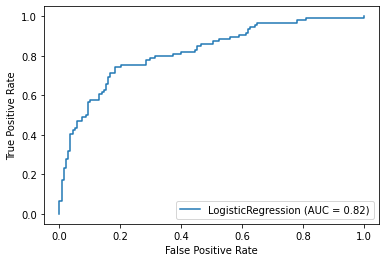

In [9]:
plot_roc_curve(log_reg, input_test, target_test);

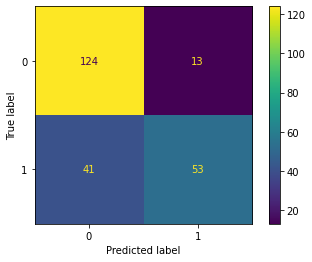

In [11]:
plot_confusion_matrix(log_reg, input_test, target_test, values_format ='');

In [12]:
print("Accuracy: {:0.4f}".format(accuracy_score(target_test,predictions)))

Accuracy: 0.7662
